# Suiside Rate Analysis

**Objecttive:**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploratory

**About Dataset** [Suicide Rates from 1990 to 2022](https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022)


In [2]:
df = pd.read_csv("./suicide_rates_1990-2022.csv")

We'll gather statistics for each column, distinguishing between two types: numeric and categorical

In [3]:
# Summarize data
def df_stats(df):
    table = pd.DataFrame(df.dtypes, columns=['Data Type'])
    table['Count'] = df.count().values
    table['Missing (%)'] = round((df.isna().sum()) / len(df) * 100, 2)
    table['Uniques'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    table['Min'] = desc['min'].values
    table['50%'] = desc['50%'].values
    table['Max'] = desc['max'].values
    table['Mean'] = desc['mean'].values
    table['Stdv'] = desc['std'].values
    display(table)

df_stats(df)

,Data Type,Count,Missing (%),Uniques,Min,50%,Max,Mean,Stdv
RegionCode,object,118560,0.00,6,NaN,NaN,NaN,NaN,NaN
RegionName,object,118560,0.00,6,NaN,NaN,NaN,NaN,NaN
CountryCode,object,118560,0.00,117,NaN,NaN,NaN,NaN,NaN
CountryName,object,118560,0.00,117,NaN,NaN,NaN,NaN,NaN
Year,int64,118560,0.00,33,1990.0,2006.0,2022.0,2005.740047,8.745003
Sex,object,118560,0.00,3,NaN,NaN,NaN,NaN,NaN
AgeGroup,object,118560,0.00,7,NaN,NaN,NaN,NaN,NaN
Generation,object,118560,0.00,7,NaN,NaN,NaN,NaN,NaN
SuicideCount,float64,118096,0.39,1868,0.0,4.0,6787.0,63.632037,254.095408
CauseSpecificDeathPercentage,float64,114271,3.62,46425,0.0,0.586166,100.0,3.87369,7.31782


Remove any missing values present in the `SuicideCount` column as part of our analysis on suicide.

In [4]:
df.dropna(subset=["SuicideCount"], inplace=True)

In [5]:
# Numeric columns. The "Year" column is dropped for numeric columns
df_num = df.select_dtypes(include=np.number).drop(["Year"], axis=1)
# Categorical columns.
df_cat = df.select_dtypes(exclude=np.number)

### Correlation

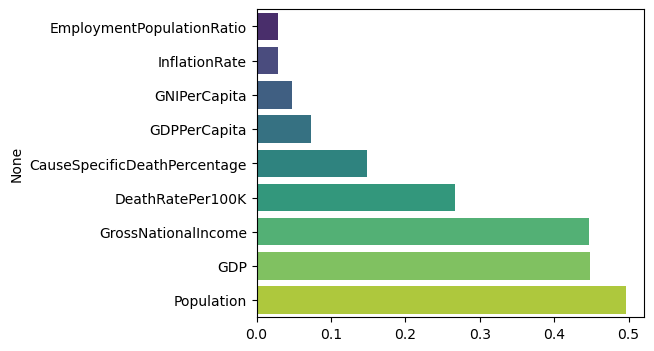

In [6]:
corr_data = df_num.corr()["SuicideCount"][1:].sort_values()

plt.figure(figsize=(5, 4))
sns.barplot(x=corr_data.values, y=corr_data.index, palette="viridis");

As depicted in the bar plot, it's evident that the `SuicideCount` doesn't exhibit a robust correlation with the other numerical attributes, as the correlation values span from 0 to less than 0.5. This suggests that the suicide rate isn't directly influenced by these numerical features but rather indirectly.

## Feature Analysis

### Overall Trend in The World

We aim to examine how the suicide rate fluctuates annually and analyze the trend of each feature in relation to the suicide rate.



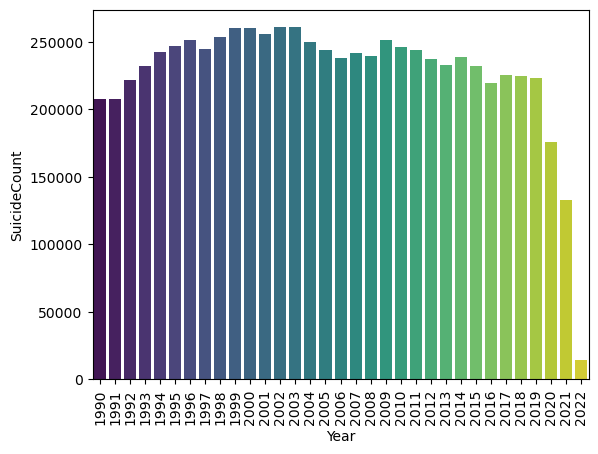

In [7]:
sns.barplot(df.groupby("Year")["SuicideCount"].sum(), palette="viridis")
plt.xticks(rotation=90);

The number of suicides in 2022 is notably lower compared to previous years. This could be attributed to incomplete data collection within that year. To mitigate bias in our analysis, we will exclude data from 2022.

In [8]:
# Eliminate 2022 data
df_clean = df[~(df["Year"] == 2022)]
# Calculate total suicide for each year
year_SuicideCount = df_clean.groupby("Year", as_index=False)["SuicideCount"].sum()
year_SuicideCount.head(3)

,Year,SuicideCount
0,1990,207445.0
1,1991,207584.0
2,1992,221963.0


Visualize suicide trend over the years

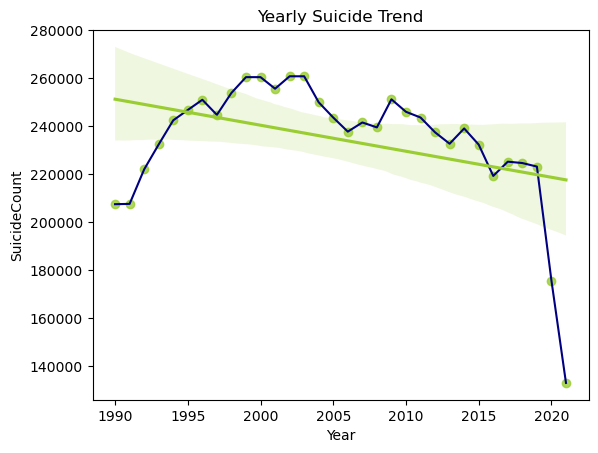

In [107]:
# Plot the original data
sns.lineplot(year_SuicideCount, x="Year", y="SuicideCount", color="navy").set(title="Yearly Suicide Trend")
# Plot trend
sns.regplot(year_SuicideCount, x="Year", y="SuicideCount", color="yellowgreen");

The global trend is showing a decline. We will investigate various factors within the data to discern the underlying reasons for this trend. Nonetheless, it's important to note that this trend may vary across countries, as nations with higher rates of depression often experience increased incidents of suicide.

From 2020 to 2021, there was a significant decline in a trend, coinciding with the onset of the Covid-19 pandemic. Many nations enforced home quarantine measures to curb community transmission. This restriction likely limited opportunities for individuals to go outside or spend time alone, potentially affecting suicide rates. Our analysis will explore variations in suicide rates across genders and countries before and after the pandemic's onset in 2020.

### Gender

In [71]:
# Calculate total suicide for each year by gender
gender_SuicideCount = df_clean.groupby(["Year", "Sex"], as_index=False)["SuicideCount"].sum()
# Total suicide count by gender
gender_total = gender_SuicideCount.groupby("Sex")["SuicideCount"].sum()
gender_total

Sex
Female     1708190.0
Male       5792205.0
Unknown        339.0
Name: SuicideCount, dtype: float64

The number of individuals with unknown gender is notably smaller compared to the other two primary groups. Therefore, we will omit the unknown gender category to primarily concentrate on the main trend.

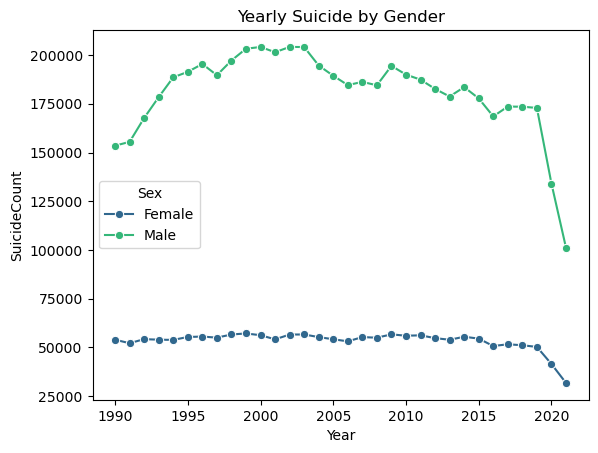

In [106]:
# Plot total suicide for each year by gender
sns.lineplot(
    data=gender_SuicideCount[gender_SuicideCount["Sex"] != "Unknown"], x="Year", y="SuicideCount", hue="Sex",
    marker="o", palette="viridis", linewidth=1.5
).set(title="Yearly Suicide by Gender");

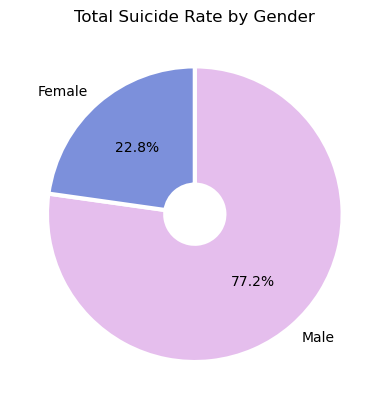

In [108]:
# Pie chart for total suicide ocunt by gender
label = ["Male", "Female"]
# Plot pie chart 
fig, ax = plt.subplots()
ax.pie(gender_total[label], labels=label, colors=["#E5BEED", "#7C90DB"], autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=dict(width=0.8, edgecolor='w', linewidth=3));
ax.set_title("Total Suicide Rate by Gender");

Over the years, males consistently demonstrate approximately three times higher suicide rates compared to females, and the trends of both genders correspond to the overall pattern illustrated in the preceding figure.

### Countries and Regions

In [36]:
print("The total number of countries =", len(df_clean["CountryName"].unique()))
print("The total number of regions =", len(df_clean["RegionName"].unique()))
df_clean["RegionName"].unique()

The total number of countries = 117
The total number of regions = 6


array(['Europe', 'Central and South America', 'Asia', 'Oceania',
       'North America and the Caribbean', 'Africa'], dtype=object)

In [41]:
# Total suicide for each year by countries
country_SuicideCount = df_clean.groupby(["Year", "CountryName"], as_index=False)["SuicideCount"].sum()
# Create pivot table
country_SuicideCount_pv = country_SuicideCount.pivot_table(index='Year', columns='CountryName', values='SuicideCount', aggfunc='sum')

In [64]:
# Total suicide for each year by regions
region_SuicideCount = df_clean.groupby(["Year", "RegionName"], as_index=False)["SuicideCount"].sum()
regionTotal = region_SuicideCount.groupby("RegionName")["SuicideCount"].sum()
regionTotal.sort_values(ascending=False, inplace=True)

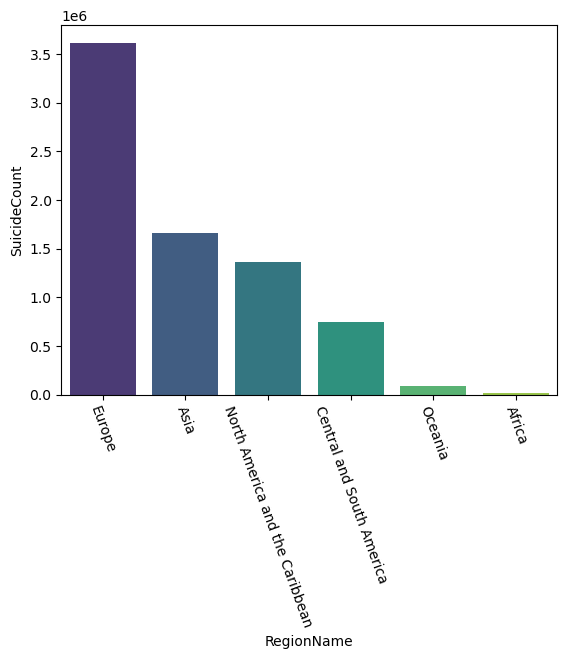

In [65]:
sns.barplot(regionTotal, palette="viridis")
plt.xticks(rotation=-70);